# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [223]:
#Import all the necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [224]:
pima_df=pd.read_csv("diabetes.csv")
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [225]:
print(pima_df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [226]:
print(pima_df.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

# Q3 Print the datatypes of each column and the shape of the dataset 

In [227]:
print(pima_df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [228]:
print("shape of the data set is ", pima_df.shape)

shape of the data set is  (768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [229]:
#0 is not replaced for Pregnancies and Class columns as pregnancies can be 0 and Outcome is the target class
pima_df["Glucose"]=pima_df["Glucose"].replace(0, pima_df["Glucose"].median())
pima_df["BloodPressure"]=pima_df["BloodPressure"].replace(0, pima_df["BloodPressure"].median())
pima_df["SkinThickness"]=pima_df["SkinThickness"].replace(0, pima_df["SkinThickness"].median())
pima_df["Insulin"]=pima_df["Insulin"].replace(0, pima_df["Insulin"].median())
pima_df["BMI"]=pima_df["BMI"].replace(0, pima_df["BMI"].median())
pima_df["DiabetesPedigreeFunction"]=pima_df["DiabetesPedigreeFunction"].replace(0, pima_df["DiabetesPedigreeFunction"].median())
pima_df["Age"]=pima_df["Age"].replace(0, pima_df["Age"].median())

In [230]:
pima_df.head().T

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,23.000,23.000,35.000
Insulin,30.500,30.500,30.500,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


# Q5 Print the descriptive statistics of each & every column using describe() function

In [231]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

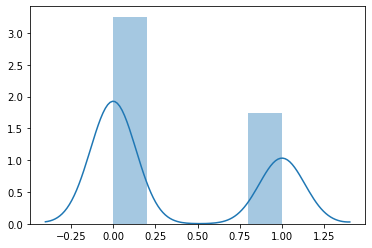

In [232]:
import seaborn as sns
sns.distplot(np.array(pima_df["Outcome"]))


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

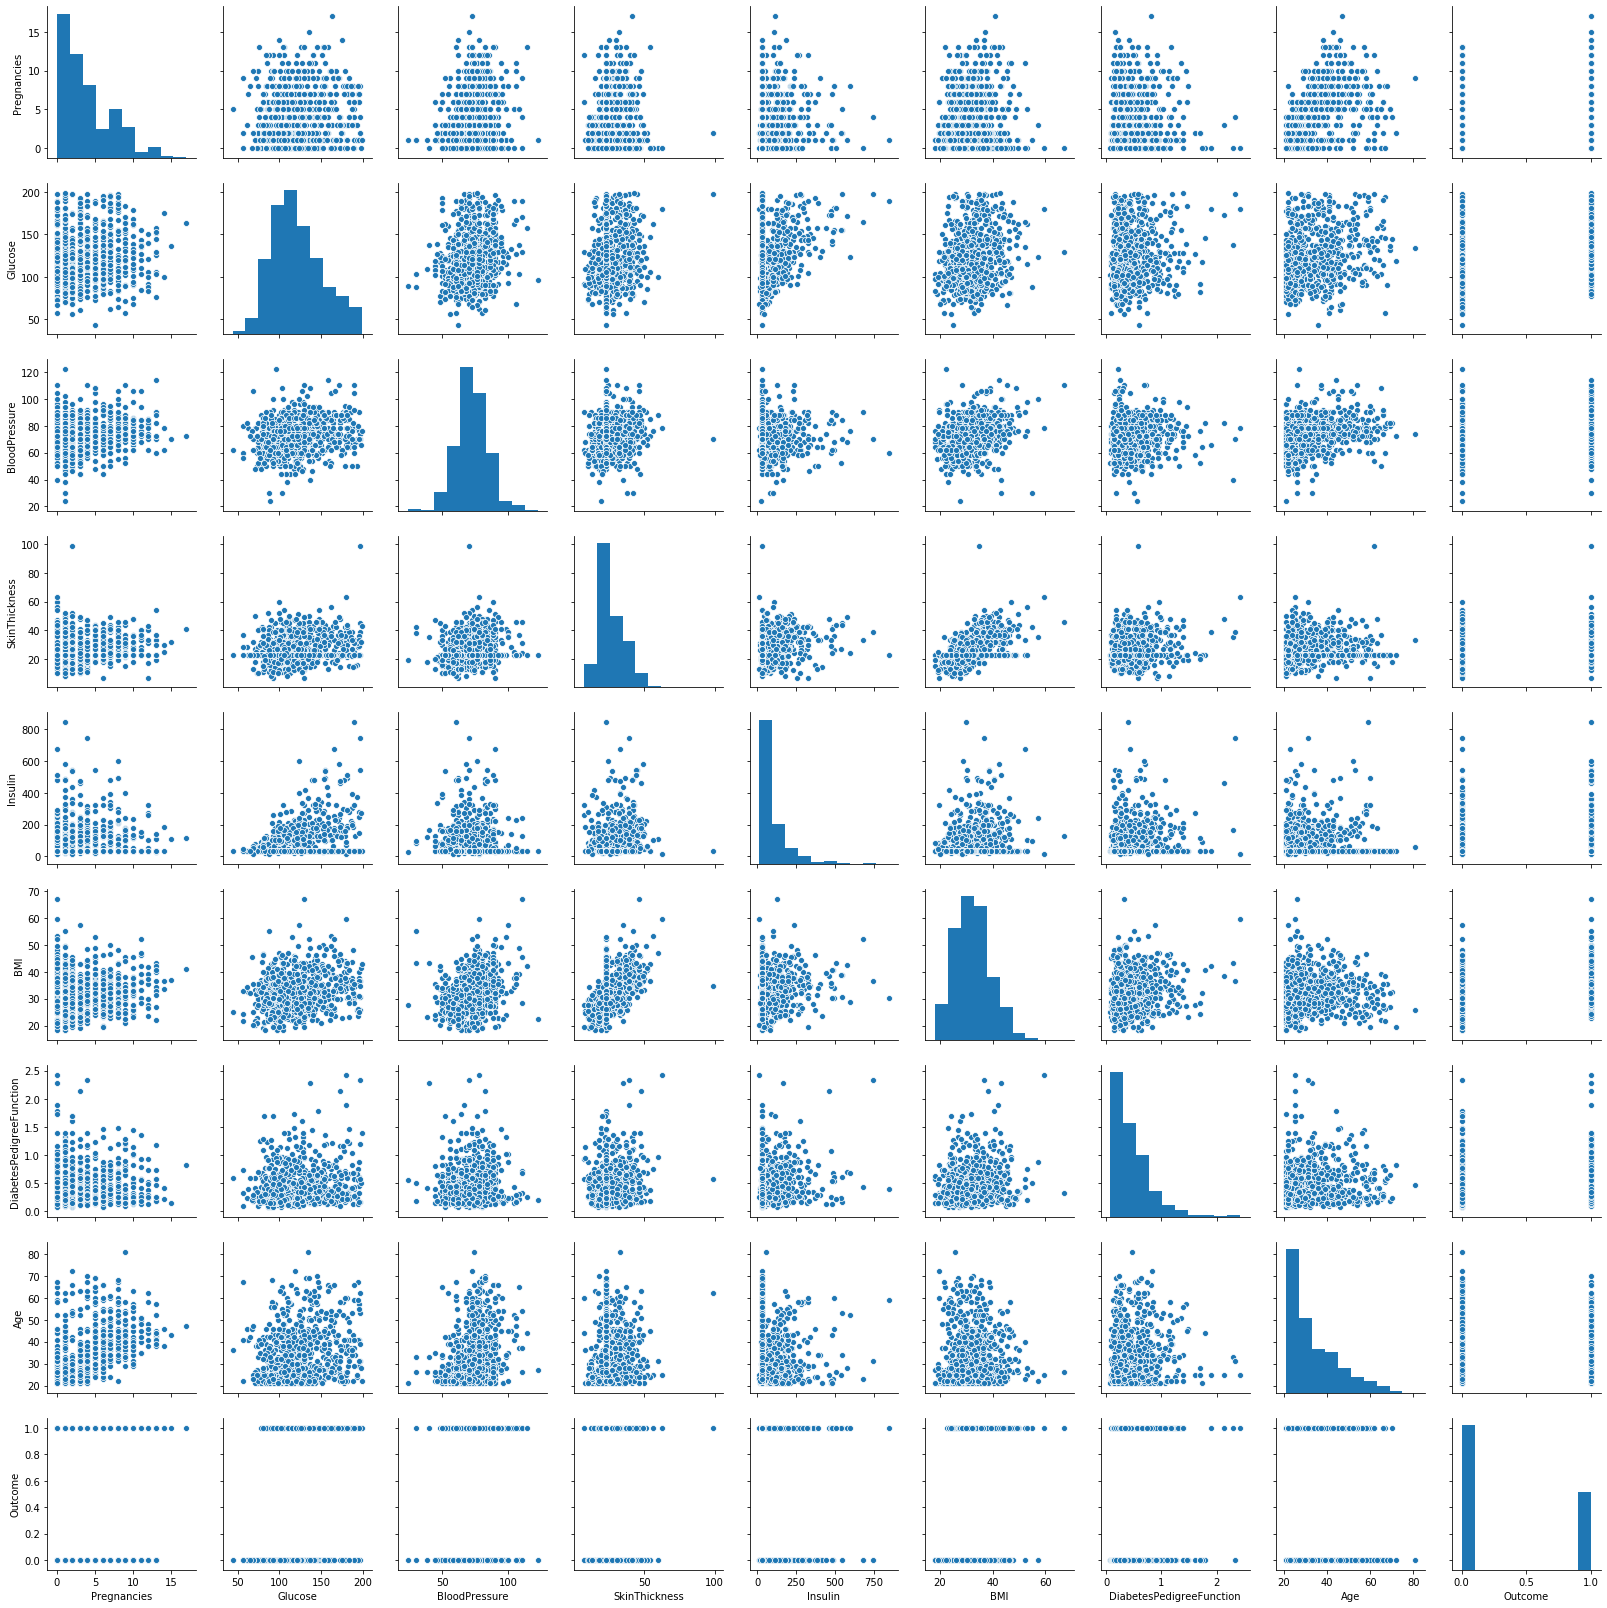

In [233]:
sns.pairplot(pima_df)

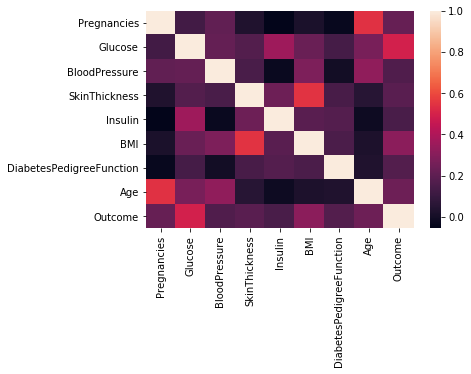

In [234]:
sns.heatmap(pima_df.corr())

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [235]:
X = pima_df.drop(["Outcome"], axis=1)
y = pima_df["Outcome"]
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [236]:
pima_model = DecisionTreeClassifier(criterion = 'entropy' )
pima_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [237]:
pima_model.score(X_train , y_train)

1.0

In [238]:
pima_model.score(X_test , y_test)

0.7142857142857143

In [239]:
#REGULARIZING THE DECISION TREE WITH MIN LEAF SAMPLE AND MAX DEPTH VALUE
#invoking the decision tree classifier function. Using 'entropy' method of finding the split columns
#using max depth as 5. However. max depth can be >1
pima_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf=5 )
pima_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [240]:
print("Accuracy of the training data is", pima_model.score(X_train, y_train))

Accuracy of the training data is 0.7951582867783985


In [241]:
print("Accuracy of the test data i.e production data is",pima_model.score(X_test , y_test))

Accuracy of the test data i.e production data is 0.7186147186147186


In [242]:
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

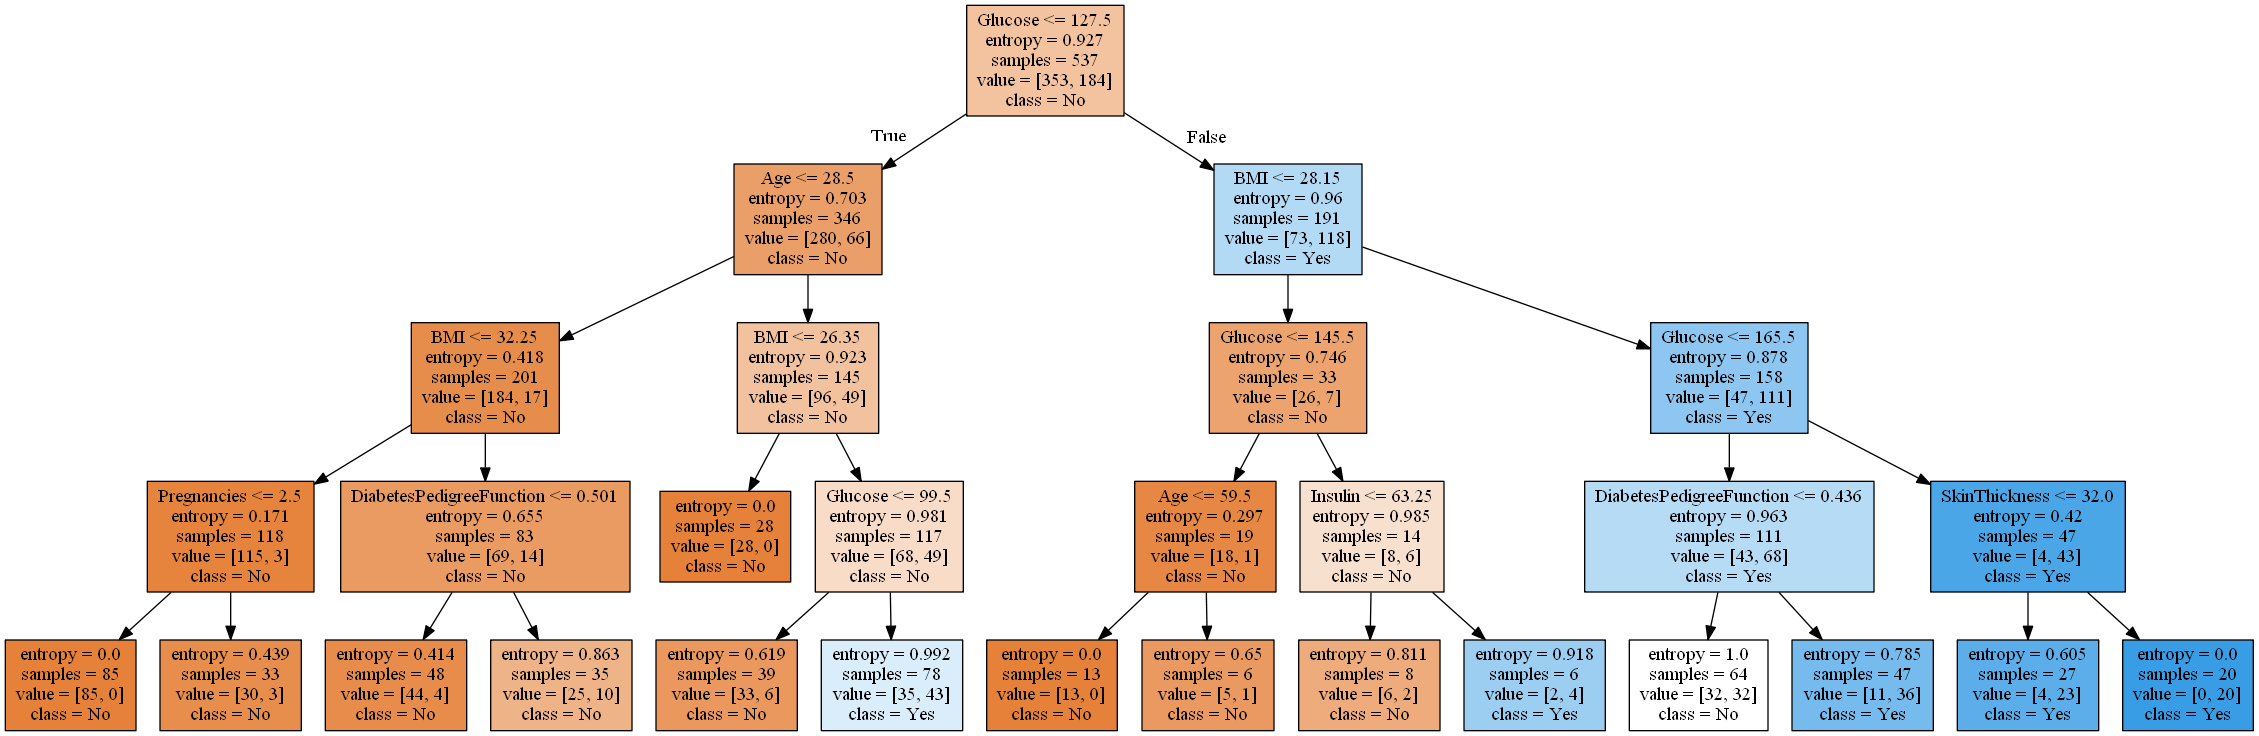

In [243]:
#printing decision tree - This is done as I had doubt in the questions: so please take it optional if it was not required
graph2, = print_tree(pima_model, features=X_train.columns, class_names=['No', 'Yes'])
Image(graph2.create_png())

# Q10 Print the accuracy of the model & print the confusion matrix 

In [244]:
y_predict=pima_model.predict(X_test)
print("The Confusion matrix is", metrics.confusion_matrix(y_predict, y_test))

The Confusion matrix is [[108  26]
 [ 39  58]]


In [245]:
print("Accuracy of Training data", pima_model.score(X_train , y_train))
print("Accuracy of Test or Production data", pima_model.score(X_test , y_test))

Accuracy of Training data 0.7951582867783985
Accuracy of Test or Production data 0.7186147186147186


Print the feature importance of the decision model - Optional

In [247]:
importances = pima_model.feature_importances_
importances

array([0.02849629, 0.51289556, 0.        , 0.0170923 , 0.00902459,
       0.24412488, 0.05170267, 0.13666371])

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [248]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion="entropy", n_estimators = 100, max_depth=5)

In [249]:
rfcl = rfcl.fit(X_train, y_train)

In [250]:
print("Accuracy of the decision tree model using Random Forest for Training data is", rfcl.score(X_train, y_train))

Accuracy of the decision tree model using Random Forest for Training data is 0.8547486033519553


In [251]:
print("Accuracy of the decision tree model using Random Forest for Training data is", rfcl.score(X_test, y_test))

Accuracy of the decision tree model using Random Forest for Training data is 0.7575757575757576


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [252]:
pima_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=5 )

In [254]:
adaboostClass = AdaBoostClassifier(base_estimator=pima_model, n_estimators=100)

In [256]:
adaboostClass = adaboostClass.fit(X_train, y_train)

In [257]:
print("Accuracy of the train data using Adaboost is", adaboostClass.score(X_train, y_train))

Accuracy of the train data using Adaboost is 1.0


In [258]:
print("Accuracy of the test data i.e production data using Adaboost is", adaboostClass.score(X_test , y_test))

Accuracy of the test data i.e production data using Adaboost is 0.70995670995671


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [259]:
pima_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=5 )

In [260]:
bgcl = BaggingClassifier(n_estimators=50)

In [261]:
bgcl = bgcl.fit(X_train, y_train)

In [262]:
print("Accuracy of the train data using Bagging Classifier is", bgcl.score(X_train , y_train))

Accuracy of the train data using Bagging Classifier is 1.0


In [263]:
print("Accuracy of the test data i.e production data using Bagging Classifier is", bgcl.score(X_test , y_test))

Accuracy of the test data i.e production data using Bagging Classifier is 0.7878787878787878


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [264]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)

In [265]:
gbcl = gbcl.fit(X_train, y_train)

In [266]:
print("Accuracy of the train data using GradientBoost Classifier is",gbcl.score(X_train , y_train))

Accuracy of the train data using GradientBoost Classifier is 0.9869646182495344


In [267]:
print("Accuracy of the test data i.e production data using GradientBoost Classifier is", gbcl.score(X_test, y_test))

Accuracy of the test data i.e production data using GradientBoost Classifier is 0.7792207792207793
